This notebook aims at providing an overview of **major Machine Learning algorithms and technics** used nowadays for **regression and classification**. There is an attempt to include with each one of them a theoretical explanation along with the associated python code to apply it.

The algorithms covered include:
- Logistic Regression
- K-nearest neightbors
- Decision Trees Based algorithms 
- Ensemble learners (AdaBoost ...)

To be covered:
- K-means
- Naive Bayes - probabilitic classifier
- Support Vector Machines
- Ridge Regression and Lasso Regression and Elastic Net
    
    

In [59]:
import numpy as np

## Logistic Regression [Supervised - Binary classifications]

#### Theory

**Logistic Regression** is a highly performing binary classifier aiming at estimating the probability that an instance belongs to a certain binary class. Its value compared to purely binary classifiers such as bernouillie law lies in the fact that it handles outliers with slighty more caution, lowering its confidence about an instance belonging to a certain class when it fells close from the boundary.

**Business example**: In a fraud detection case, largelly used across many industries (Finance, telco, e-commerce...) - an analyst may not only want to know which client is likely to fraud but also account the probability of fraud to identify the cases where the most money is at stake (probability multiplied by amount of transaction).

**Model explanation** Logistic regression aims at predicting the probability $p(\vec{x})$ that a given instance described by a vector $\vec{x}$ belongs to a positive class. A useful way to describe such a probability is to use the **odds** as shown in table below (i.e. ratio of the event occuring over the event not occuring.). As the range of the odds still fall in the range $[0 - +\infty]$, we apply logarithm for our range to represent it within $[-\infty-\infty]$. This is necessary as ultimately, we want $f(x)$ to represent the distance to the decision boundary separating the two classes. This implies that this distance can either be positive or negative. 

| Probability  | Odds          | Log-odds |
| :--------------- |:---------------:| -----:|
| 0.01  | 1:99 or 0.0101          |    -4.6 |
| 0.5  |   50:50 or 1        |  0 |
| 0.9  | 90:10 or 9            |   2.19 |
| 0.999  | 999:1 or 999          |    6.9 |

We will therefore want the model to estimate $f(\vec{x}) = θ^T x $ or the log odds that $\vec{x}$ belongs to the positive class. 

$$
\large 
f(x) = \log(\frac{p_+(x)}{1-p_+(x)}) = θ^T x
$$

Then isolating the probability of class membership $p_+(x)$, not the log-odds, using the sigmoid function $ \in [0-1]$:

$$
\large 
p_+(x) = \frac{1}{1+e^{-f(x)}} = \sigma (θ^T x)
$$


Let's visualize the sigmoid function.


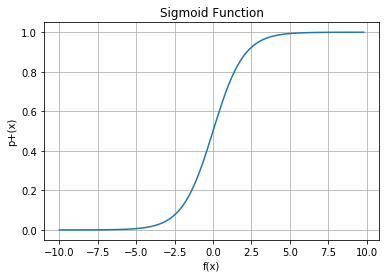

In [49]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10., 10., 0.2)

def sigmoid_array(x):                                        
    return 1 / (1 + np.exp(-x))Let's visualize the sigmoid function.

plt.plot(list(x),list(sigmoid_array(x)))
plt.grid()
plt.title("Sigmoid Function")
plt.xlabel("f(x)")
plt.ylabel("p+(x)")
plt.show()

Visualizing the plot allows to see the intuitive notion that there is a realtive certainty in the estimations of class membership of instances far from the decision boundary, and uncertainty near the decision boundary.

**Optimizing θ parameters**

From a probabilitic interpretation, the logistic regression is alike a bernouilli law, following a success and failure probability. 


$$ p(y=1 | x;θ) = θ^T x$$ <br>
$$ p(y=0 | x;θ) = 1-θ^T x$$

with $θ^T x$ being the probability of belonging to the positive class (and also the expectation). 

Combining the two equalities above,we find the probability of a certain value $x$ by replacing it in the following :

$$
P(X = x) = p(y | x;θ) = (θ^T x)^y (1-θ^T x)^{1-y}
$$


- **Actual training:**
Assuming that the m training examples are generated independantly, the likelihood (cost function) of the parameters θ is the following :

$$ \mathcal{L}(θ) = p(y|X;θ) = \prod_{i=1}^{m} p(y_{i}|x_{i};θ)$$

replacing with the equation above, we obtain the following cost function.

$$ \mathcal{L}(θ) = \prod_{i=1}^{m}(θ^T x_{i})^{y_{i}} (1-θ^T x_{i})^{1-y_{i}} $$

- **Maximum Likelyhood Estimation (MLE): **We then involve the Logarithm to optimise sums as opposed to products and prevent numerical underflow (all values influenced by a single 0).

$$ \mathcal{L}(θ) = log L(θ)$$<br>
$$\sum_{i=1}^{m} y_{i}log(θ^T x_{i}) + (1-y_{i})log(1-θ^T x_{i})$$

       remember that   $ log(x^{y}) = y log(x)$

- **finding optimal θ**
    - Take the derivative and do a gradient ascent (maximisation problem): $θ = θ + \lambda \nabla_{θ} \mathcal{L}(θ)$
    - Or take the negative of the log likelyhood function $-\mathcal{L}(θ)$ and perform a stochastic gradient descent.


#### Code Application

```python
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'lbfgs')#Note that there exists several different types of solvers that performs differently depending on the type of training data (size, density, sparsity,type, L1 or L2 regularization, etc)

log_reg.fit(X_train,y_train)
log_reg.predict(x_test)

```
more information about the different solvers and so on here: 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### K-nearest neightbors [Supervised - Regression and Classification]

#### Theory

#### Notes on distances - useful to understand the similarity measures between instances

In [61]:
a = np.array([1,2,3])
b = np.array([12,3,42])

- **Euclidean distance (L2) - most common**:

$$d(x_i,x_j) = ||x_i - x_j||_2 = \sqrt{(\sum_{i,j=1}^{n}(x_i - x_j)^2}$$

In [60]:
dist = numpy.linalg.norm(a-b)
dist

40.533936399022487

- **Manhattan distance (L1)**: 

$$d(x_i,x_j) = ||x_i- x_j||_1 = \sum_{i,j=1}^{n}(x_i - x_j)$$


In [62]:
dist = numpy.linalg.norm(a-b,1)
dist

51.0

- **Lp-norm (Lp)**:

$$d(x_i,x_j) = ||x_i-x_j||_p = (\sum_{i,j=1}^{n}(x_i - x_j)^p)^\frac{1}{p}$$

In [64]:
p = 3
dist = numpy.linalg.norm(a-b,p)
dist

39.289755113675689

- **Person Correlation** :

$$p(x,z) = \frac{Cov(x,z)}{\sigma_x\sigma_z} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})*(z_i- \bar{z})}{\sqrt{\sum_{i=1}^{n}(x_j -\bar{x})^2}*\sqrt{\sum_{i=1}^{n}(z_i -\bar{z})^2}}$$ = 
with the sample mean $\bar{x}$: 

$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i$$


In [66]:
dist = np.corrcoef(a,b)
dist

array([[ 1.        ,  0.73455316],
       [ 0.73455316,  1.        ]])

- **Cosine Similarity** : 

$$Cos θ = \frac{\vec{a}•\vec{b}}{|\vec{a}||\vec{b}|} = \frac {\sum_{i=1}^{n}a_i b_i}{\sqrt{\sum_{i=1}^{n}a_{i}^{2}}\sqrt{\sum_{i=1}^{n}b_{i}^{2}}} $$

In [71]:
import numpy.linalg as npalg
cos_sim = np.dot(a, b)/(npalg.norm(a)*npalg.norm(b))
cos_sim

0.87899705055781407

#### Theory about K-nearest neightbors

**K-neirest neightbors** is an intuitively easy to understand non-parametric algorithm used both for classification and regression. It assigns to a new instance $y$ the averaged value of its $k$ neirest neightbors. 

$$ y = \frac{1}{k}\sum_{i=1}^{k}y_i$$

Note that there exists a variant of KNN that assigns different weights $w_n$ to the neighbord $n$ according to their distance to the test point. It is recommanded to normalize the scale of the attributes to make the distance comparision relevant.

$$w_{n} = exp(\frac{1}{2}*d(x,x_{n}))$$

Its **advantages** include:

- Fast training time
- Robust to noisy data
- Ability to implicitly learn complex representations

On the other hand major **disadvantages** include:

- High memory requirements during training as every training data points have to be stored
- Slow predictions
- High dimensional data (curse of dimensionality) makes the computation of distances expansive and irrelevant in some cases when too many dimensions. Therefore, the algorithm requires a lot of training data. 

**Choosing K parameters**

This is the whole challenge behind this algorithm. A high k will provide underfitted output whereas a low value for k will give an overfitted result. 

To find the optimal value of the parameter k:

- **option 1)** use cross validation and examine the misclassification error.

- **option 2)** use the rule of thumb with $n$ training examples
$$k = \sqrt{n}$$

#### Code

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html 

## Decision Trees based algorithms [Supervised - Classifications and Regressions]

#### Theory

**Decision tree based algorithm** are a very popular category of algorithms used both for regressions and classifications. They are refered as *ensemble learners* as the output decisions is made of the aggregation of the predictions of multiple learning trees such as the one shown below, each one trained on a subset of the initial training dataset. Tree based algorithms use the various attributes of an instance as decision criterias to split the dataset into spaces of classes.  

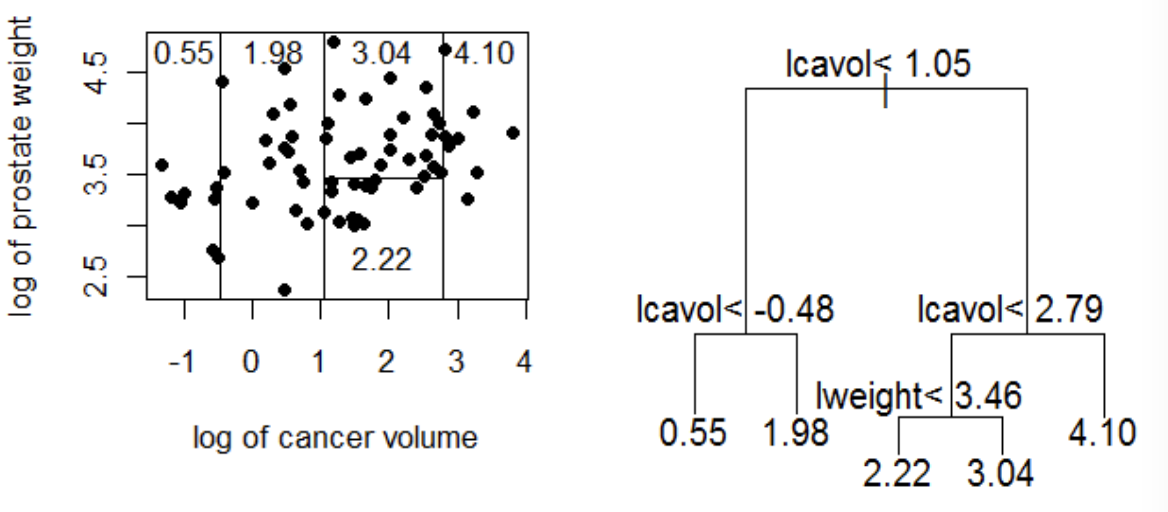

http://www.math.usu.edu/adele/RandomForests/UofU2013.pdf

Its **advantages** include:

- Easy interpretability - mirroring human decision making process
- Handling of both numerical and categorical variable
- Speed / performance ratio 

On the other hand major **disadvantages** include:

- Very greedy algorithms finding locally optimal solutions at each stages with the intent to find a global optimum but often failing to produce the global optimum
- Non-robust to change in the testing data 
- Very likely to overfit if not properly trained - i.e. the leaf size too small or maximum depth too big  (we will cover later in this section methods to limit overfiting)

**Parameters to choose**:

- **num_trees** : Number of learning trees to train and combine to make predictions. Increasing this number will result in a higher accuracy until a certain point, but the training time will increase linearly. 
- **max_depth**: Restrict the depth (i.e. number of decision criterias) of each individual trees to prevent overfitting. 
- **Splitting Criteria**: Which method to use to determine the splitting value of an attribute that differentiate two classes. We elaborate further on this in the next section.  
- **min_child_weight**: In a classification, that would correspond to the minimum observations required at a leaf node. Larger values produce simpler trees. (reasonnable value around #training instances/1000)
- **min_loss_reduction**: Restrict the reduction of loss function for a node split. Larger value also produce simpler trees. 
- **row_subsample**:  fraction of the training data to use at each iteration, reducing computational cost and creating more robust models. 
- **column_subsample**: Subset of columns os of the training data to use at each iterations, also reducing computational cost and creating more robust models. 

**Special section on Splitting criterias parameter**:

The splitting criterias is a key parameter that determines the metrics to monitor to decide on the value that will split a given attribute leaf in two or more nodes (i.e. decision criterias). Generally speaking, the goal of these splitting criterias is to measure the purity of the subgroups that are splitted at a node. 

The major splitting criterias include the following:

- 1) **Gini Index (often the default option)**
- 2) **Entropy**
- 3) **Residual Sum of Squares.**

****

- 1) **Gini Index (often the default option)**

The Gini Index comprised between $[0-1]$ is often considered as the default metrics to measure purity within a group with $J$ classes. The goal is to minimise this value.

$$ 1 - (\sum_{j=1}^{J}(\frac{x_j}{Total})^2)$$

with x_j being the instances that belong to the class $J$.

*Example*: 

*Group 1* has 0 elements belonging to Class 1 and 6 elements belonging to Class 2.

*Group 2* has 1 elements belonging to Class 1 and 5 elements belonging to Class 2.


- Gini(Group 1) = $1 - P(C1)^2 - P(C2)^2 $
$= 1 - (0/6)^2 - (6/6)^2 = 0$


- Gini(Group 2) = $1 - P(C1)^2 - P(C2)^2 $
$= 1 - (1/6)^2 - (5/6)^2 = 0.278$

So Group 1 is purer.


- 2) **Entropy**

Another purity measure, very similar to the Gini criteria is called entropy $\in [0-1]$. 
High diversity = High entropy = low performance of the separator. We therefore try to minimize the entropy.

 $$ entropy =  \sum_{i=1}^{C} -p_i log(p_i)$$

with $C$ classes and $p_i$ is the proportion of class $i$ within the set. Note that the entropy is maximal when $p_i$ = 0.5 (in a case with two subclasses) representing the maximal degree of diversity in the dataset.

In order to choose a splitting criteria, it is useful to compute a weighted mean of the entropy of the subsets that are split by the separator weighted by each subsets size.

*Example*: 

*Group 1* has 0 elements belonging to Class 1 and 6 elements belonging to Class 2.

*Group 2* has 1 elements belonging to Class 1 and 5 elements belonging to Class 2.


- Entropy(Group 1) $  = - P(C1)*logP(C1) - P(C2)*logP(C2) $
$= - \frac{0}{6} * log\frac{0}{6} - \frac{6}{6}*log\frac{6}{6}$


- Entropy(Group 2) $  = - P(C1)*logP(C1) - P(C2)*logP(C2) $
$= - \frac{1}{6} * log\frac{1}{6} - \frac{5}{6} * log\frac{5}{6} $ 

So Group 1 is purer.


- 3) **Residual Sum of Squares.**

We will try to minimise the following value to reduce the distance of each datapoint with it's class' mean. 

$$ RSS =  \sum_{i=1}^{N_{Left}} (yi - \hat{y_{left}})^2 +  \sum_{i=1}^{N_{Right}} (yi - \hat{y_{right}})^2$$

Where $\hat{y_{right}}$ is the mean of the target variable that we try to predict for the right node
and $\hat{y_{left}}$ is the mean y-value for the left node.

For more information : http://www.math.usu.edu/adele/RandomForests/UofU2013.pdf

**Avoiding overfitting**

Final branches can become irrelevant when it comes to generalizing, and end up providing highly overfitted models. Finding the right size for your tree is key. This is called the *Horizon effect*. 

One common approach to find the right size of a tree is known as *pruning* as described below:

- **Pre-pruning:** The idea is to set a threshold which set the minimum size of the leaf under which the tree must stop growing. 
- **Post-pruning:** Remove branches (i.e. depth) from a fully grown tree.  

Using **cross validation** (i.e. building our tree on a subset of our training data and testing it on the validation set), it is possible to find the optimal leaf size or tree depth. A good example can be found here: https://www.displayr.com/machine-learning-pruning-decision-trees/

#### Code

## Ensemble Classifiers [Supervised - Classification and Regression]

#### Theory

**Ensemble of classifier** is a technic that takes the individual decisions of several classifiers and average them into a final decision. This makes a simple algorithm becoming a "super classifier".

Ensemble methods differs in training strategy and combination method. There bascially exist two major family of ensemble classifier: 

- **Bagging algorithms** - combine several learners trained on various child subset datasets of a single mother training dataset.
- **Boosting algorithms** - combine several learners trained on various child subset datasets weighted by how easy their instances are to make predictions on.  

**Bagging**

The idea is to **train in parallell** $T$ models on overlapping $T$ training child datasets (Randomly sampled with replacement from a single mother training dataset) and average their predictions $y_i$. 

$$y = \frac{1}{T}\sum_{i=1}^{T} y_i$$


A famous algorithm using such technic for instance is the decision tree based algorithm **Random Forest**.

**Boosting**

The idea is to **sequentially train** $T$ algorithms and each time re-weight the $i$ training examples based on the output of the previous classifier $t_{-1}$, to allow the current classifier's cost function $J_t$ to focus on the "hard examples" that are strongly weighted $w_{i}^{t}$. Ultimately each of the classifiers will participate in the vote for the new instance value $y$ with their influence being weighted by their quality $\gamma_t$

- Each classifier is **minimising the cost function** $J_t$ equivalent to the sum of weighted errors:


$$ \large J_t = \sum_{i=1}^{n} w_i^t I(y_t(x_i) \neq t_i)$$


Where $I(y_t(x_i) \neq t_i)$ is an identity function outputing $1$ if the classifier predictS an error, $0$ otherwise. In otherword, if properly predicted, the training datapoint won't account in the cost function.


- At each phase $t$, the **weights $w_i^{t+i}$ of the cost function are updated** as followed:


$$ \large w_{i}^{t+1} \longleftarrow w_{i}^{t}*exp({\alpha_t *I(y_t(x_i) \neq t_i})$$


where $\alpha_t$ is the **quality of the classifier** $t$ taking value zero if the classifier has a weighted error rate of 0.5 and infinite if the classifie is perfect: 

$$\alpha_t \longleftarrow{\frac{1-\gamma_t}{\gamma_t}} $$

and where $\gamma_t$ is the **weighted error rate** of the classifier $t$:


$$\gamma_t = \frac{J_t}{\Sigma_{i=1}^{n}w_i^t}$$


- Finally, **to make a prediction**, we ue the weighted error rate of the classifier (giving the quality of the that classifier) to assign the weight of the decision of each classifier.

$$\large y = \sum_{t=1}^{T}\alpha_ty_t(x)$$

#### Code